In [1]:

from functions.N_fctn_load_excel import load_excel_to_dataframe
from functions.N_fctn_subset_non_none import subset_non_none_values
from functions.P_fctn_fill_missing_values import fill_missing_values
from functions.B_fctn_drop_columns import drop_columns
import warnings
#suppress the warning:
warnings.filterwarnings("ignore", category=Warning)


In [3]:

daf = load_excel_to_dataframe('MAIN_DATA.xlsx')
daf_reduced = subset_non_none_values(daf, 'real_net_monetary_index')


daf_reduced_copy = daf_reduced.copy()

#nans in coins and artifs filled:
daf_reduced_with_none_being_zero = fill_missing_values(daf_reduced_copy, {'artifs_rate':0, 'coins_rate':0, 'rate_artifs_dummy':0, 'rate_coins_dummy':0}) 

daf_reduced_with_none_being_zero = drop_columns(daf_reduced_with_none_being_zero, ['number_artifs','submitted_number_artifs', 'number_coins', 'submitted_number_coins'],)

#print(daf_reduced_with_none_being_zero)

#print(daf_reduced_with_none_being_zero['artifacts'] )
daf_reduced_with_none_being_zero = subset_non_none_values(daf_reduced_with_none_being_zero, 'artifacts')

daf_artif_or_coin_uploaded = daf_reduced_with_none_being_zero.copy()

'''
daf_reduced_with_none_being_zero = daf_reduced_with_none_being_zero[daf_reduced_with_none_being_zero['artifacts'] != 0]

print(daf_reduced_with_none_being_zero['artifacts'] )
'''

from functions.R_fctn_subset_dataframe import subset_dataframe
daf_reduced_with_none_being_zero = subset_dataframe(daf_artif_or_coin_uploaded, 'uploaded_at_least_one_artif_or_coin_dummy')
#print(daf_reduced_with_none_being_zero['artifacts'] )


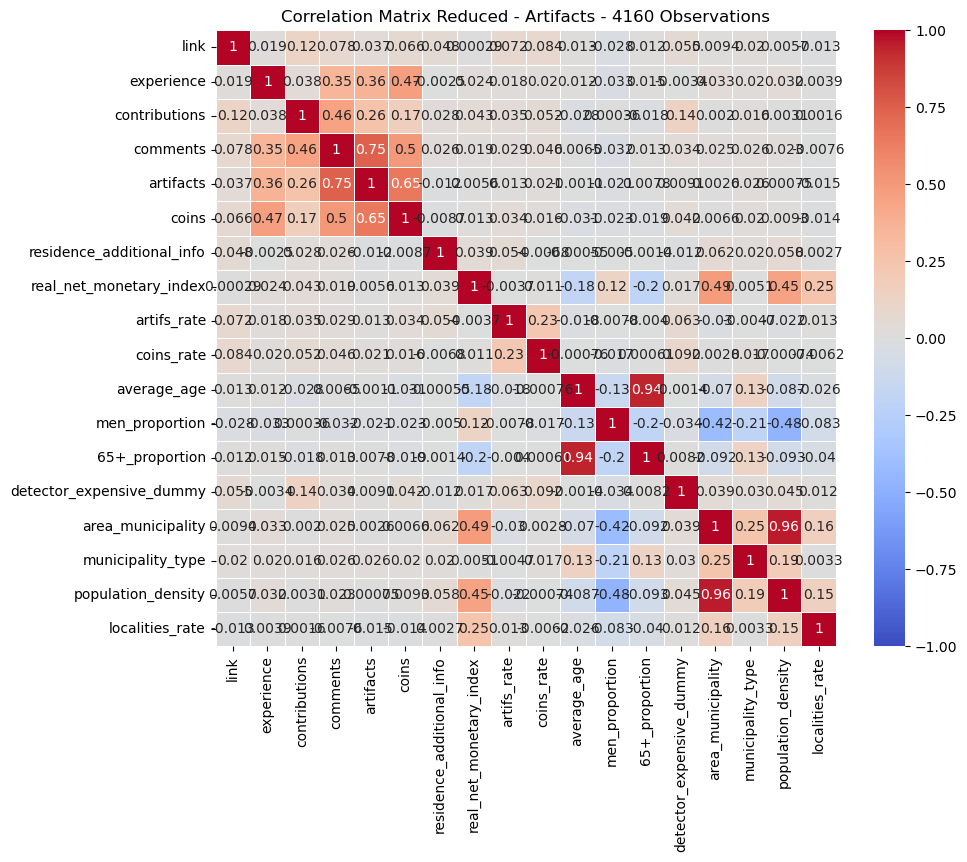

In [4]:
from functions.Q_fctn_create_correlation_matrix import create_correlation_matrix


create_correlation_matrix(daf_reduced_with_none_being_zero,['link',                                        
'experience',                                  
'contributions',                               
'comments',                                    
'artifacts',                                   
'coins',                                       
'residence_additional_info','real_net_monetary_index',                     
'artifs_rate',                                 
'coins_rate',                                  
'average_age',   
'men_proportion',                              
'65+_proportion',                              
'detector_expensive_dummy',                    
'area_municipality',                           
'municipality_type',                           
'population_density',                         
'localities_rate'],'Correlation Matrix Reduced - Artifacts - 4160 Observations')



In [5]:

#############->>>>>>>so from the correlation matrix, only slight changes so we keep the same variables as in the 1st non-reduced dataset:
daf_reduced_with_none_being_zero = drop_columns(daf_reduced_with_none_being_zero, ['area_municipality',                           
'municipality_type',                           
'population_density',
'average_age',                                                        
'uploaded_at_least_one_artif_or_coin_dummy',   
'men_proportion',                              
'65+_proportion'])

In [6]:
#############2. summary statistics:
from functions.Q_fction_get_summary_statistics import get_summary_statistics
summary_reduced_1 = get_summary_statistics(daf_reduced_with_none_being_zero)
print(summary_reduced_1 )


                           count  unique                mode  frequency
profile                     4160    4160               Detek          1
link                        4160       2                 0.0       4042
experience                  4160     601                 0.0       1840
contributions               4160      73                 0.0       3519
comments                    4160     383                 0.0        546
artifacts                   4160     181                 1.0        949
coins                       4160     123                 0.0       1388
residence_additional_info   4160       2                 0.0       4125
municipality                4160     888               Praha        363
municipal_office            4160     354  Hlavní město Praha        408
real_net_monetary_index     4160     354            1.131666        408
artifs_rate                 4160     144                 0.0       3904
coins_rate                  4160      39                 0.0    

In [7]:
from functions.Q_fction_get_summary_statistics import get_extended_summary_statistics
summary_reduced_1_ext = get_extended_summary_statistics(daf_reduced_with_none_being_zero)
print(summary_reduced_1_ext)

                            count    mean      std   min   25%   50%    75%  \
link                       4160.0    0.03     0.17  0.00  0.00  0.00   0.00   
experience                 4160.0  467.05  5413.11  0.00  0.00  4.00  50.00   
contributions              4160.0    1.95    25.56  0.00  0.00  0.00   0.00   
comments                   4160.0   85.69   594.30  0.00  2.00  6.00  25.00   
artifacts                  4160.0   15.70    68.53  0.00  1.00  3.00  11.00   
coins                      4160.0    7.18    21.03  0.00  0.00  1.00   6.00   
residence_additional_info  4160.0    0.01     0.09  0.00  0.00  0.00   0.00   
real_net_monetary_index    4160.0    1.00     0.07  0.77  0.95  0.98   1.05   
artifs_rate                4160.0    0.01     0.08  0.00  0.00  0.00   0.00   
coins_rate                 4160.0    0.00     0.04  0.00  0.00  0.00   0.00   
rate_artifs_dummy          4160.0    0.06     0.24  0.00  0.00  0.00   0.00   
rate_coins_dummy           4160.0    0.01     0.12  

In [8]:

import numpy as np
df_log = daf_reduced_with_none_being_zero[['artifs_rate', 'experience','contributions',               
'comments',                    
'artifacts',                   
'coins',                                      
'real_net_monetary_index',                 
'coins_rate',                    
'localities_rate','rate_artifs_dummy',                           
'rate_coins_dummy', 'link', 'residence_additional_info', 'detector_expensive_dummy']]


df_log['log_experience'] = np.log(df_log['experience'].values + 1)
df_log['log_contributions'] = np.log(df_log['contributions'].values + 1)
df_log['log_comments'] = np.log(df_log['comments'].values + 1)
df_log['log_artifacts'] = np.log(df_log['artifacts'].values + 1)
df_log['log_artifs_rate'] = np.log(df_log['artifs_rate'].values + 1)
df_log['log_coins'] = np.log(df_log['coins'].values + 1)
df_log['log_coins_rate'] = np.log(df_log['coins_rate'].values + 1)
df_log['log_localities_rate'] = np.log(df_log['localities_rate'].values + 1)
#print(df_log)

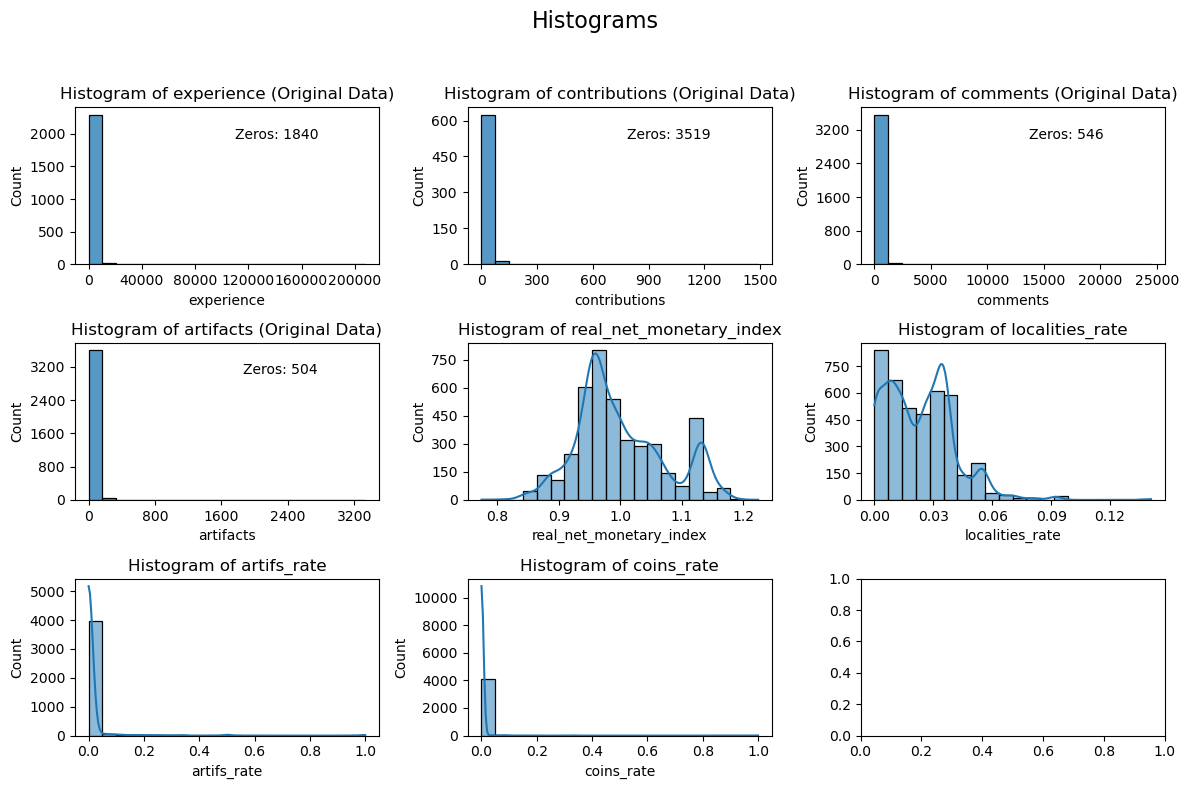

In [9]:
#HISTOGRAMS for the ind. variables (non-dummies):
from functions.S_fctn_create_combined_hist import create_histograms_all
create_histograms_all(df_log, [                        
'experience',                  
'contributions',               
'comments',                                       
'artifacts',                                      
'real_net_monetary_index',                    
'localities_rate', 'artifs_rate', 'coins_rate'])


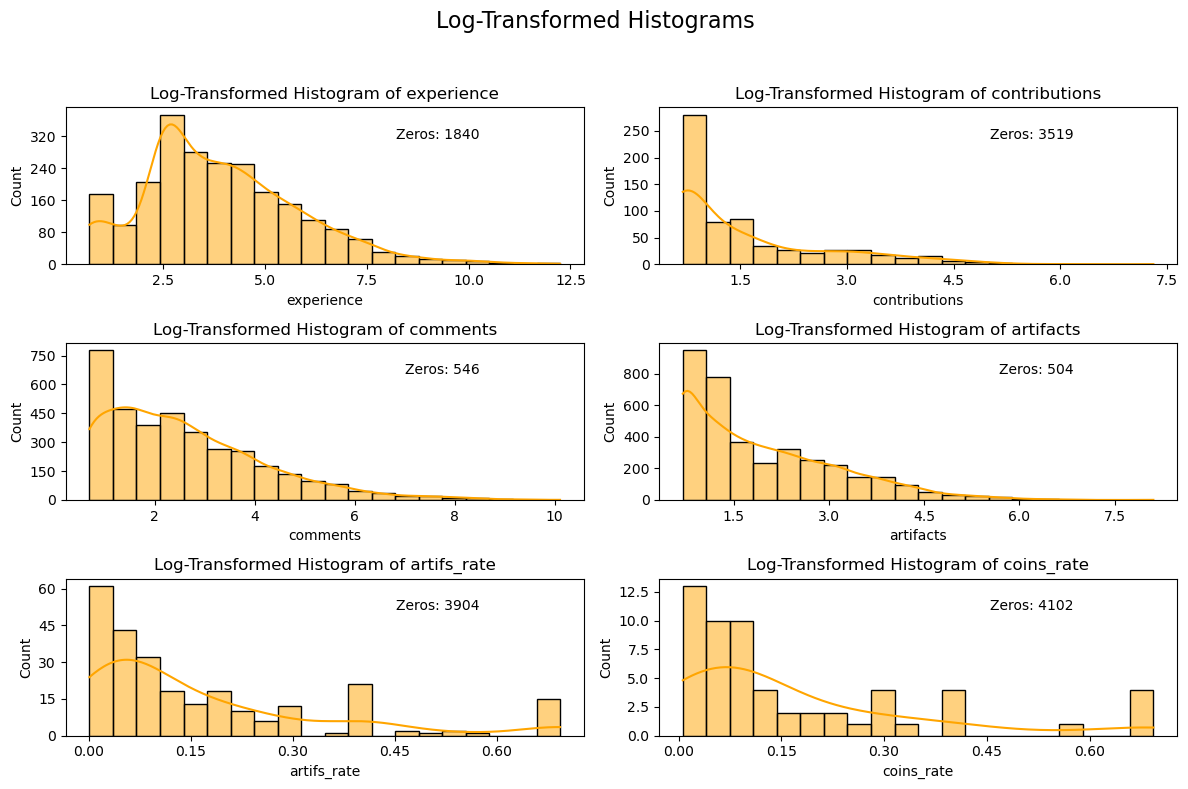

In [10]:
from functions.S_fctn_create_combined_hist import create_log_transformed_histograms

create_log_transformed_histograms(df_log, [                        
'experience',                  
'contributions',               
'comments',                                    
'artifacts',                                                          
'artifs_rate', 'coins_rate'])


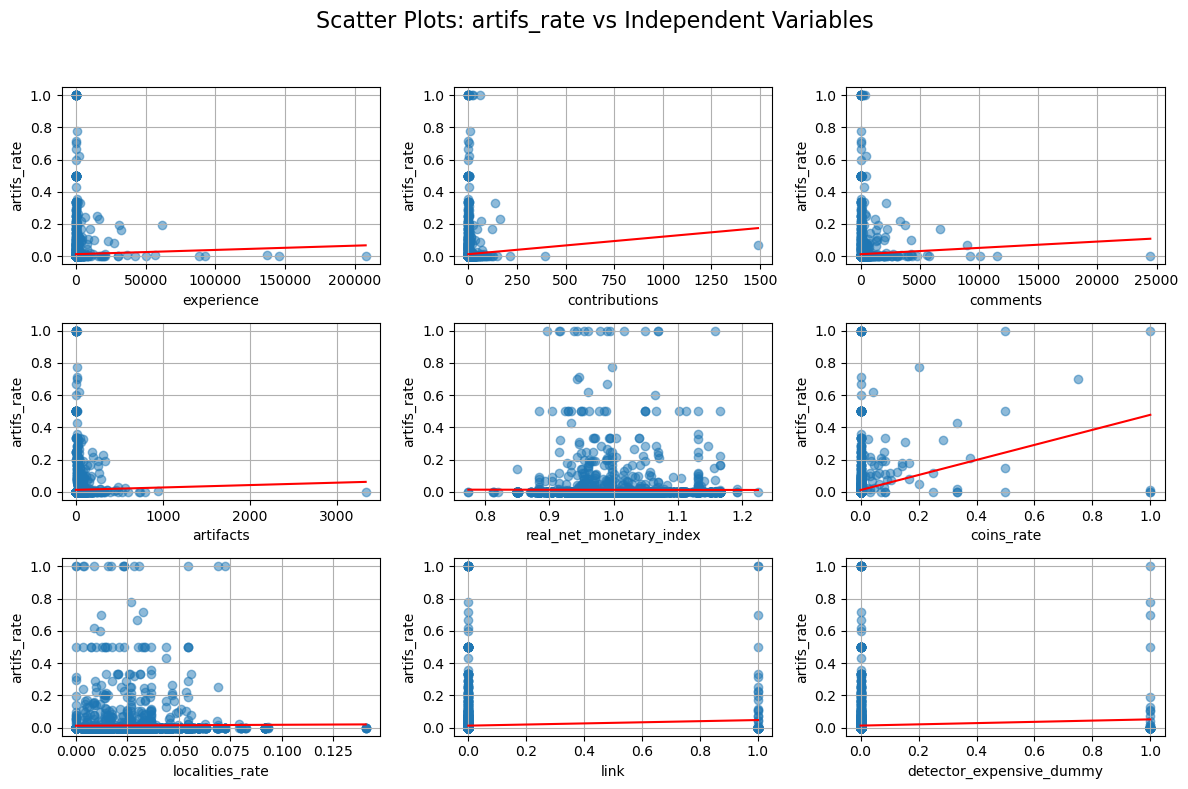

In [11]:
#'PLOT INITIAL SCATTER PLOTS
from functions.Q_fctn_plot_scatter import plot_scatter_all
plot_scatter_all(df_log, 'artifs_rate', ['experience', 'contributions',
                                     'comments', 'artifacts',
                                     'real_net_monetary_index', 'coins_rate', 'localities_rate','link','detector_expensive_dummy'])


In [12]:
from functions.W_fctn_print_top import print_top_observations

print_top_observations(df_log, columns=[ 'experience','contributions',               
'comments',                    
'artifacts'])

Top 5 observations for column 'experience':
      experience  contributions  comments  artifacts
119       207830             25      3085        735
1262      145348              2     11539        724
2615      137050              3      3371        355
1664       92662             56      3044        939
120        88322              3      1432         52

Top 5 observations for column 'contributions':
      experience  contributions  comments  artifacts
61           604           1489      8964        125
1580          74            395     24463       3332
851           80            215      2005          0
756        16429            164      1175        309
2252          30            149      2023          1

Top 5 observations for column 'comments':
      experience  contributions  comments  artifacts
1580          74            395     24463       3332
1262      145348              2     11539        724
4030        7914             20     10105         15
128         2795 

In [13]:

df_log_2 = df_log.copy()


df_log_2 = df_log_2[df_log_2['experience'] != 207830]
df_log_2 = df_log_2[df_log_2['contributions'] != 1489]
df_log_2 = df_log_2[df_log_2['comments'] != 24463]
df_log_2 = df_log_2[df_log_2['artifacts'] != 3332] #DELETE THE MOST SIGNIFICANT OUTLIERS

df_log_3 = df_log_2.copy()

df_log_2 = df_log_2[df_log_2['artifs_rate'] != 1]  #DELETE THE ONES


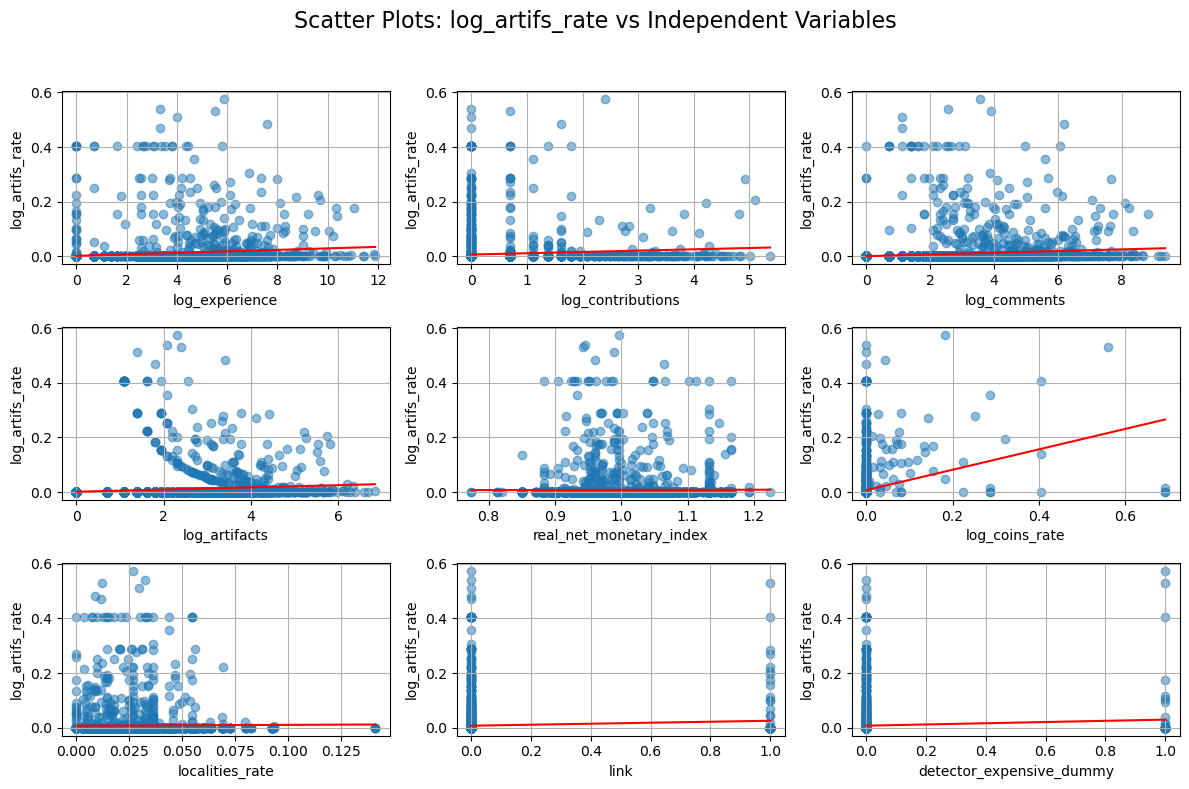

In [14]:
#plot scatter plots after log transform and without outliers:
from functions.Q_fctn_plot_scatter import plot_scatter_all
plot_scatter_all(df_log_2, 'log_artifs_rate', ['log_experience', 'log_contributions', 
                                      'log_comments', 'log_artifacts', 
                                     'real_net_monetary_index', 'log_coins_rate', 'localities_rate','link','detector_expensive_dummy'])

In [15]:
from functions.V_fct_OLS_REGRESSION import ols_regression

#first model, without log transform:
model1 = ols_regression(df_log_2, 'artifs_rate', [ 'experience', 'contributions', 'comments', 'artifacts',
                                      'real_net_monetary_index', 'coins_rate', 'localities_rate', 'link', 'residence_additional_info', 'detector_expensive_dummy'])


Regression Summary:
                            OLS Regression Results                            
Dep. Variable:            artifs_rate   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     21.96
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.75e-40
Time:                        21:11:37   Log-Likelihood:                 6298.9
No. Observations:                4142   AIC:                        -1.258e+04
Df Residuals:                    4131   BIC:                        -1.251e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

In [16]:


model2 = ols_regression(df_log_2, 'log_artifs_rate', ['log_experience', 'log_contributions', 
                                     'log_comments', 'log_artifacts',
                                     'real_net_monetary_index', 'log_coins_rate', 'localities_rate','link', 'residence_additional_info', 'detector_expensive_dummy'])



Regression Summary:
                            OLS Regression Results                            
Dep. Variable:        log_artifs_rate   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     32.04
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           2.09e-60
Time:                        21:11:59   Log-Likelihood:                 7116.3
No. Observations:                4142   AIC:                        -1.421e+04
Df Residuals:                    4131   BIC:                        -1.414e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

In [18]:
from functions.V_fctn_OLS_ROBUST import ols_regression_robust

model2_ROBUST = ols_regression_robust(df_log_2, 'log_artifs_rate', ['log_experience', 'log_contributions', 
                                     'log_comments', 'log_artifacts',
                                     'real_net_monetary_index', 'log_coins_rate', 'localities_rate','link', 'residence_additional_info', 'detector_expensive_dummy'])

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:        log_artifs_rate   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     10.56
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           7.16e-18
Time:                        21:12:32   Log-Likelihood:                 7116.3
No. Observations:                4142   AIC:                        -1.421e+04
Df Residuals:                    4131   BIC:                        -1.414e+04
Df Model:                          10                                         
Covariance Type:                  HC1                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

In [19]:
from functions.V_fctn_OLS_WLS import ols_regression_wls
model2_WLS = ols_regression_wls(df_log_2, 'log_artifs_rate', ['log_experience', 'log_contributions', 
                                     'log_comments', 'log_artifacts',
                                     'real_net_monetary_index', 'log_coins_rate', 'localities_rate','link', 'residence_additional_info', 'detector_expensive_dummy'])


Regression Summary:
                            WLS Regression Results                            
Dep. Variable:        log_artifs_rate   R-squared:                       0.726
Model:                            WLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1094.
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:12:58   Log-Likelihood:                 18181.
No. Observations:                4142   AIC:                        -3.634e+04
Df Residuals:                    4131   BIC:                        -3.627e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

In [20]:
model2_LPM = ols_regression_robust(df_log_3, 'rate_artifs_dummy', ['log_experience', 'log_contributions', 
                                     'log_comments', 'log_artifacts',
                                     'real_net_monetary_index', 'log_coins_rate', 'localities_rate','link', 'residence_additional_info', 'detector_expensive_dummy'])

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:      rate_artifs_dummy   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     25.13
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           8.97e-47
Time:                        21:13:19   Log-Likelihood:                 382.59
No. Observations:                4157   AIC:                            -743.2
Df Residuals:                    4146   BIC:                            -673.5
Df Model:                          10                                         
Covariance Type:                  HC1                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

Optimization terminated successfully.
         Current function value: 0.177048
         Iterations 8


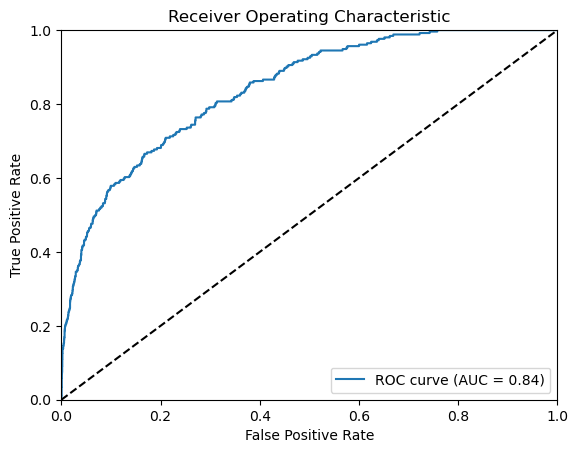

Confusion Matrix:
Predicted     0   1
Actual             
0.0        3886  17
1.0         217  37

Partial Effect At the Average (PEA):
        Logit Marginal Effects       
Dep. Variable:      rate_artifs_dummy
Method:                          dydx
At:                           overall
                               dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
log_experience                0.0073      0.002      3.953      0.000       0.004       0.011
log_contributions            -0.0003      0.004     -0.076      0.939      -0.008       0.008
log_comments                  0.0076      0.003      2.407      0.016       0.001       0.014
log_artifacts                 0.0216      0.004      5.884      0.000       0.014       0.029
real_net_monetary_index      -0.0122      0.047     -0.261      0.794      -0.104       0.080
log_coins_rate                0.4800      0.087      5

In [21]:
from functions.V_fctn_LOGIT import logit_regression_roc_wald
model2_LOGIT = logit_regression_roc_wald(df_log_3, dependent_var='rate_artifs_dummy', independent_vars=['log_experience', 'log_contributions', 
                                     'log_comments', 'log_artifacts',
                                     'real_net_monetary_index', 'log_coins_rate', 'localities_rate','link', 'residence_additional_info', 'detector_expensive_dummy'],
                                     pev_vars=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'], 
                                     ape_vars=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'],
                                     hypotheses_variables=['real_net_monetary_index',  'localities_rate'])



Optimization terminated successfully.
         Current function value: 0.176846
         Iterations 7


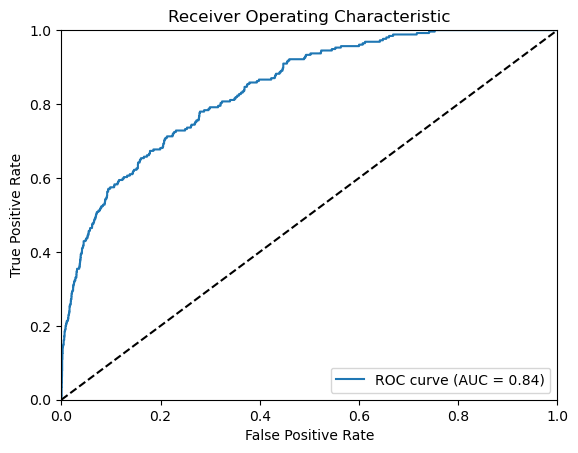

Confusion Matrix:
Predicted     0   1
Actual             
0.0        3893  10
1.0         218  36

Partial Effect At the Average (PEA):
       Probit Marginal Effects       
Dep. Variable:      rate_artifs_dummy
Method:                          dydx
At:                           overall
                               dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
log_experience                0.0078      0.002      4.280      0.000       0.004       0.011
log_contributions             0.0016      0.004      0.368      0.713      -0.007       0.010
log_comments                  0.0065      0.003      2.078      0.038       0.000       0.013
log_artifacts                 0.0228      0.004      6.118      0.000       0.016       0.030
real_net_monetary_index      -0.0141      0.047     -0.299      0.765      -0.107       0.079
log_coins_rate                0.4661      0.072      6

In [22]:
from functions.V_fctn_PROBIT import probit_regression_roc_wald


model2_PROBIT = probit_regression_roc_wald(df_log_3, dependent_var='rate_artifs_dummy', independent_vars=['log_experience', 'log_contributions', 
                                     'log_comments', 'log_artifacts',
                                     'real_net_monetary_index', 'log_coins_rate', 'localities_rate','link', 'residence_additional_info', 'detector_expensive_dummy'],
                                     pev_vars=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'], 
                                     ape_vars=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'],
                                     hypotheses_variables=['real_net_monetary_index',  'localities_rate'])

